In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [11]:
df = pd.read_csv("../USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [17]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

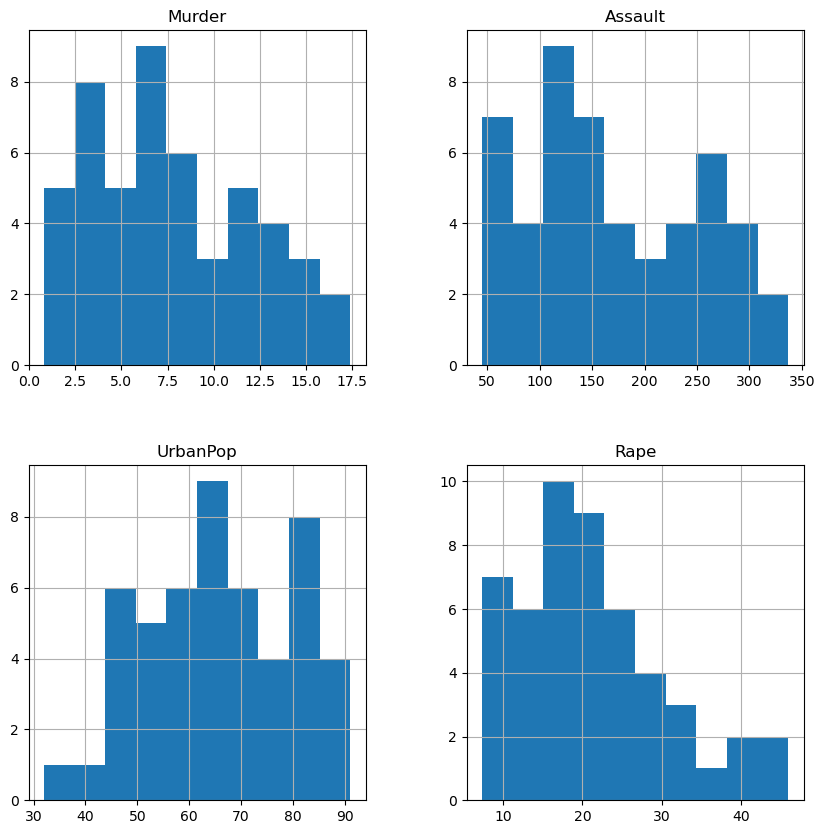

In [25]:
df.hist(figsize = (10,10))

In [27]:
kmeans = KMeans(n_clusters = 4)

In [29]:
kmeans

KMeans(n_clusters=4)

In [31]:
k_fit = kmeans.fit(df)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
k_fit.n_clusters

4

In [41]:
k_fit.cluster_centers_

array([[ 10.16666667, 202.22222222,  68.22222222,  23.32222222],
       [ 12.13571429, 277.64285714,  68.78571429,  29.78571429],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.79411765, 129.64705882,  68.29411765,  18.8       ]])

In [43]:
k_fit.labels_

array([0, 1, 1, 0, 1, 0, 3, 0, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1,
       2, 1, 0, 3, 3, 1, 2, 3, 1, 1, 1, 2, 3, 3, 3, 3, 0, 1, 2, 0, 0, 3,
       2, 3, 3, 2, 2, 3])

### Kümelerin Görselleştirilmesi(şimdilik PCA kullanmamak için 2 değişkenli olacak şekilde hesap ettik)

In [51]:
k_means = KMeans(n_clusters = 2).fit(df)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [75]:
clusters = k_means.labels_

In [77]:
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

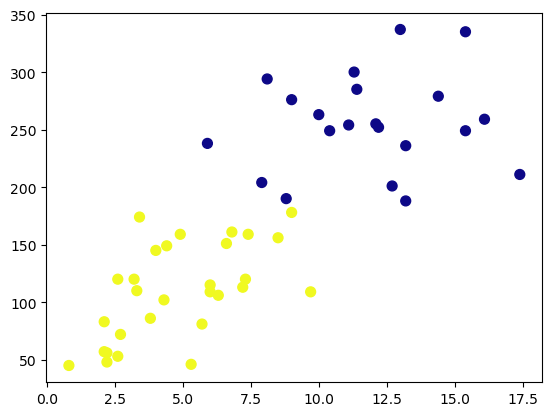

In [79]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap="plasma");

In [83]:
centers = k_means.cluster_centers_

In [85]:
centers

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

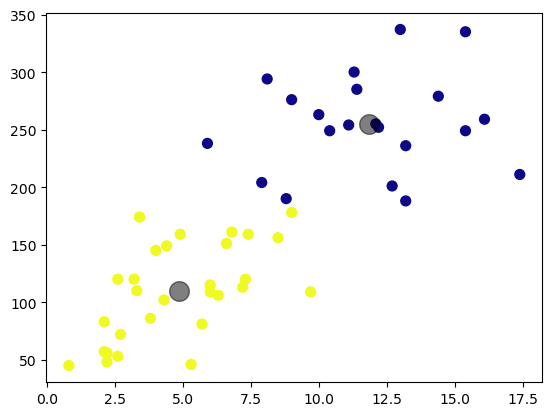

In [89]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap="plasma");
plt.scatter(centers[:,0], centers[:,1], c="black", s = 200, alpha=0.5 );

In [102]:
# optimum clusters size belirleme:
# denetimsiz öğrenemde optimum küme sayısını tamamen algoritmanın seçimine bırakmak her zaman doğr olmayabilir. Bazen iş bilgisi ve iç görülerle küme sayısını biz öngörmeliyiz.

In [110]:
# uzaklık farklarının karelerinin toplamı = ssd
ssd = []
K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Optimum Küme Sayısı için Elbow Yöntemi')

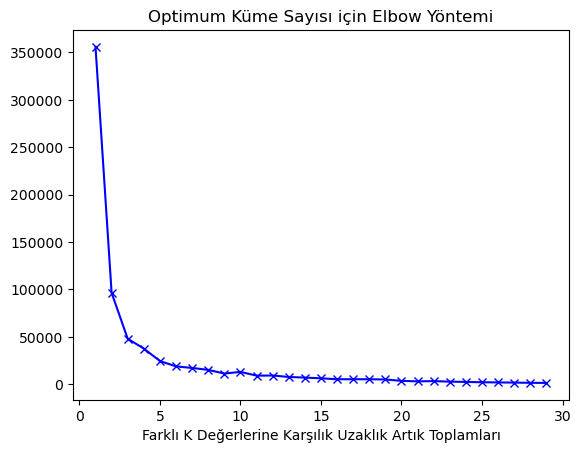

In [131]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi")
# bu yöntem kırılımı gözlemleyerek küme sayısını belirlemene yardımcı olur

In [133]:
!pip install yellowbrick

In [135]:
from yellowbrick.cluster import KElbowVisualizer

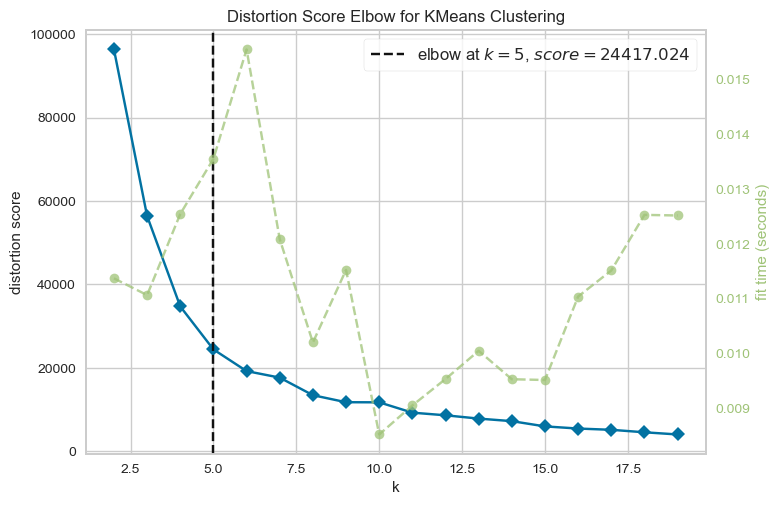

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [141]:
# küme sayısını belirlemek için diğer yöntem
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k= (2,20))
visu.fit(df)
visu.poof()

In [143]:
kmeans = KMeans(n_clusters= 4).fit(df)
kmeans

KMeans(n_clusters=4)

In [145]:
clusters= kmeans.labels_

In [147]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": clusters })

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,3
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,3
9,Georgia,2


In [149]:
df["Cluster_No"] = clusters

In [151]:
df

,Murder,Assault,UrbanPop,Rape,Cluster_No
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,2
